<a href="https://colab.research.google.com/github/mapilos/Team_23_JHB_-NEW/blob/master/Regressor_Linear__Team_23_JHB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **Regression Predict** 

Team_23_JHB_#New 

****

![alt text](https://drive.google.com/uc?id=1o1q28lb0yiJ8ijoUGjcW3DrK45FF1dKq)

## **Table of contants**

1.   **Introduction**
>* Project description
>* Variables

2.    **Data preprocessing tools**
>* Importing the libraries
>* Importing the datasets
>*Merging datasets
>* Data cleaning
>*Exploratory data analysis
>* Data preprocessing

3. **Fit Model**

4. **Perfomance evaluation**

5. **Model analysis**
>* Conclusion


# **1. Introduction**
#### Project description

The Zindi challenge, hosted by Sendy in partnership with insight2impact facility, aims to build a regression model that will predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination. The solution will help Sendy enhance customer communication and improve the reliability of its service; which will ultimately improve customer experience.

Regression is a measure of the relation between the mean value of a dependent variable (y) and corresponding values of the independent variable (x)

##Variables

**Order details**
>* order No: unique number indentifying the order
>* User Id: Unique number indefying the customer
>* Vehycle Type: Type of transport used by the rider(e.g bike)
>* Platform Type: What used to place order
>* Personal or Business: Customer type

**Placement times**: placing of order by customer*
>* Placement: Day of month
>* Placement: Weekday
>* Placement: Time

**Confirmation times**: confirmation of order by rider
>* Confirmation: Day of month
>* Confirmation: Weekday
>* Confirmation: Time

**Arrival at pickup times**: rider arrived at the location to pickup order
>* Arrival at pickup: Day of month
>* Arrival at pickup: Weekday
>* Arrival at pickup: Time

**Pickup times**: rider picked up the order
>* Pickup: Day of month
>* Pickup: Weekday
>* Pickup: Time

**Arrival at destination times**: arrival of rider to customer location
>* Arrival at delivery: Day of month
>* Arrival at delivery: Weekday
>* Arrival at delivery: Time
>* Distance covered (KM): The distance between Pickup and Destination 
>* Temperature
>* Precipitation in Millimiters
>* Pickup lattitude and longitude
>* Distination lattitude and longitude
>* Rider Id: Identification of the rider who accepted the order
>* Time from pickup to arrival: (**Tagert variable**)

**Rider metrics**: details about rider
>* Rider Id
>* No. of orders
>* Age
>* Average ratings
>* No. of ratings



# **2. Data preprocesing tools**

## Importing the libraries

In [0]:
# ignore warnings
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Imputing missing values and scaling values
#from sklearn.preprocessing import Imputer, MinMaxScaler

import folium
from folium.plugins import HeatMap


# machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse

#Displays
sns.set_style('dark')

## Importing the datasets

In [0]:
train = pd.read_csv('Train.csv')
riders = pd.read_csv('Riders.csv')
test = pd.read_csv('Test.csv')

In [69]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [0]:
#x = train.iloc[:, :-1].values
#y = train.iloc[:, -1].values


## Merging datasets

In [0]:
# merge datasets
train= pd.merge(train, riders, on='Rider Id', how='left')
test= pd.merge(test, riders, on='Rider Id', how='left')

# Rename columns
train.columns= [column.replace('Of','of') for column in train.columns]
train.columns= [column.replace('_',' ') for column in train.columns]
train.columns= [column.replace('(Mo = 1)',' ') for column in train.columns]
train= train.rename(columns=lambda x: x.strip())
test.columns= [column.replace('Of','of') for column in test.columns]
test.columns= [column.replace('_',' ') for column in test.columns]
test.columns= [column.replace('(Mo = 1)',' ') for column in test.columns]
test= test.rename(columns=lambda x: x.strip())

## Data Description

In [72]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday,Placement - Time,Confirmation - Day of Month,Confirmation - Weekday,Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday,Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No of Orders,Age,Average Rating,No of Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [73]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday,Placement - Time,Confirmation - Day of Month,Confirmation - Weekday,Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday,Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No of Orders,Age,Average Rating,No of Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


#####  Descriptive statistics summary

In [74]:
#descriptive statistics summary
train[['Time from Pickup to Arrival']].describe()

,Time from Pickup to Arrival
count,21201.000000
mean,1556.920947
std,987.270788
min,1.000000
25%,882.000000
50%,1369.000000
75%,2040.000000
max,7883.000000


## Feature Engineering

##### Eda 

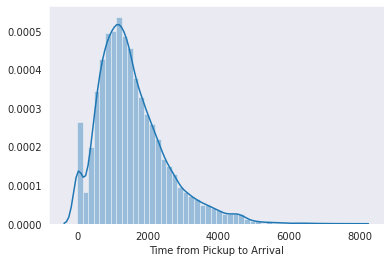

In [75]:
#histogram
sns.distplot(train['Time from Pickup to Arrival']);

>* Deviate from the normal distribution.
>* Have appreciable positive skewness.
>* Show peakedness.

In [76]:
#skewness and kurtosis
print("Skewness: %f" % train['Time from Pickup to Arrival'].skew())
print("Kurtosis: %f" % train['Time from Pickup to Arrival'].kurt())

Skewness: 1.201938
Kurtosis: 2.236352


**Relationship with numerical variables**

In [77]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday,Placement - Time,Confirmation - Day of Month,Confirmation - Weekday,Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday,Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No of Orders,Age,Average Rating,No of Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


##Data cleaning

In [78]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = round((train.isnull().sum()/train.isnull().count()*100).sort_values(ascending=False),2)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Precipitation in millimeters,20649,97.40
Temperature,4366,20.59
No of Ratings,0,0.00
Confirmation - Day of Month,0,0.00
Arrival at Pickup - Weekday,0,0.00
Arrival at Pickup - Day of Month,0,0.00
Confirmation - Time,0,0.00
Confirmation - Weekday,0,0.00
Placement - Time,0,0.00
Pickup - Day of Month,0,0.00


>* Remove 'Precipitation in millimeters' column as 97.42% of the data is missing


In [0]:
#drop 'Precipitation in millimeters' column
train.drop('Precipitation in millimeters', axis=1, inplace=True)
test.drop('Precipitation in millimeters', axis=1, inplace=True)

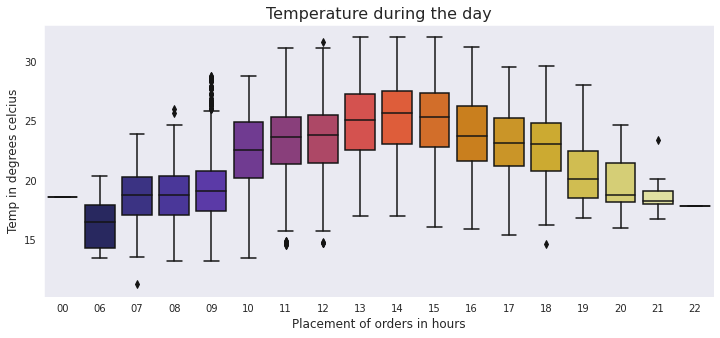

In [80]:
# create 24h time bins for when orders were placed
train['Placement - Time(bins)']= pd.to_datetime(pd.to_datetime(train['Placement - Time']).dt.strftime('%H:%M:%S')).dt.strftime('%H')

fig,axis= plt.subplots(figsize=(12,5))
sns.boxplot(x='Placement - Time(bins)', y='Temperature', data=train, palette='CMRmap')
plt.title('Temperature during the day', fontsize=16)
plt.xlabel('Placement of orders in hours', fontsize=12)
plt.ylabel('Temp in degrees celcius', fontsize=12)
plt.show()


In [0]:
#taking care of missing data
test['Temperature'].fillna(value=train['Temperature'].mean(), inplace=True)
train['Temperature'].fillna(value=train['Temperature'].mean(), inplace=True)


**Visuals**

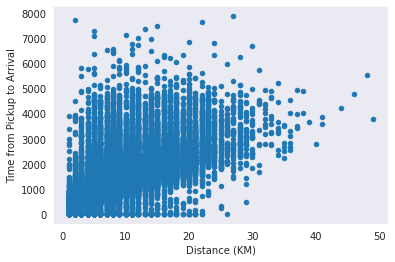

In [82]:
#scatter plot Distance (KM)/Time from Pickup to Arrival
var = 'Distance (KM)'
data = pd.concat([train['Time from Pickup to Arrival'], train[var]], axis=1)
data.plot.scatter(x=var, y='Time from Pickup to Arrival');

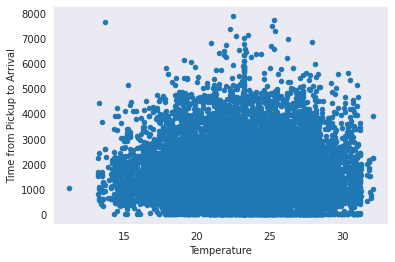

In [83]:
#scatter plot Temperature/Time from Pickup to Arrival
var = 'Temperature'
data = pd.concat([train['Time from Pickup to Arrival'], train[var]], axis=1)
data.plot.scatter(x=var, y='Time from Pickup to Arrival');

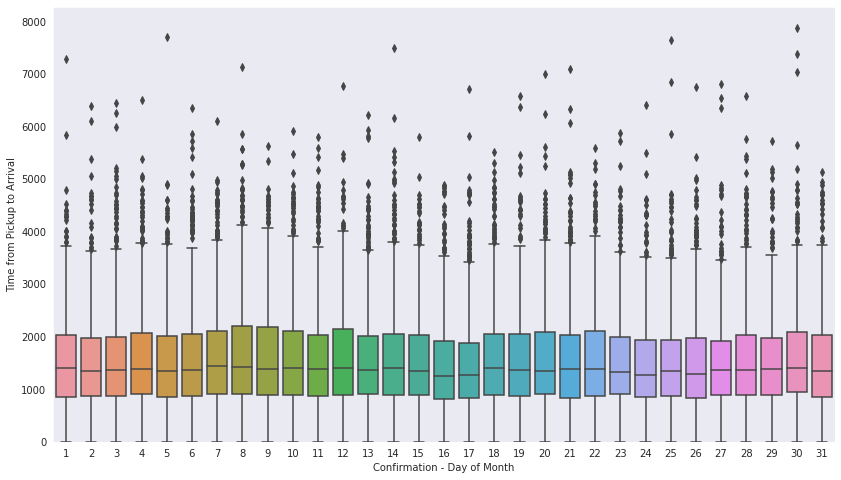

In [84]:
#box plot Confirmation - Day of Month/Time from Pickup to Arrival
var = 'Confirmation - Day of Month'
data = pd.concat([train['Time from Pickup to Arrival'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="Time from Pickup to Arrival", data=data)
fig.axis(ymin=0, yma=800000);

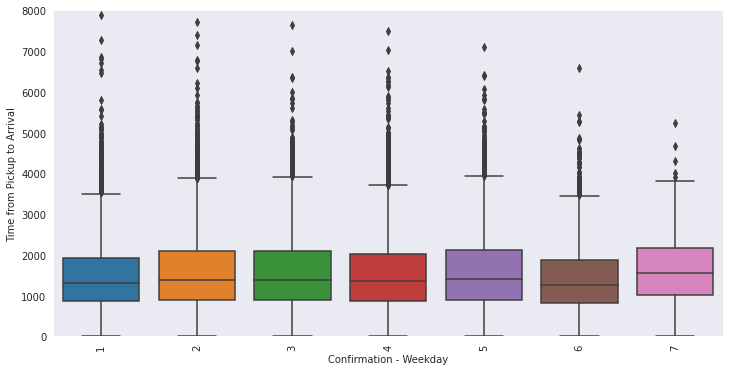

In [85]:
var = 'Confirmation - Weekday'
data = pd.concat([train['Time from Pickup to Arrival'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y="Time from Pickup to Arrival", data=data)
fig.axis(ymin=0, ymax=8000);
plt.xticks(rotation=90);

**Remove target outliers**

we can exclude outliers from 'Time from Pickup to Arrival' column based on the distance travelled.

In [86]:
# Identify outliers in target variable
train['Not outlier']=(train['Distance (KM)']+30) < train['Time from Pickup to Arrival']
print(str(len(train[train['Not outlier']==False])) + ' target outliers')

696 target outliers


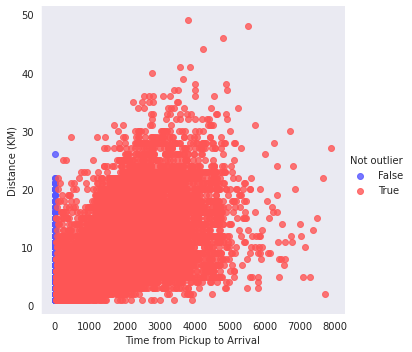

In [87]:
sns.lmplot(x='Time from Pickup to Arrival', y='Distance (KM)', data=train, hue='Not outlier', palette='seismic', fit_reg=False)
plt.show()

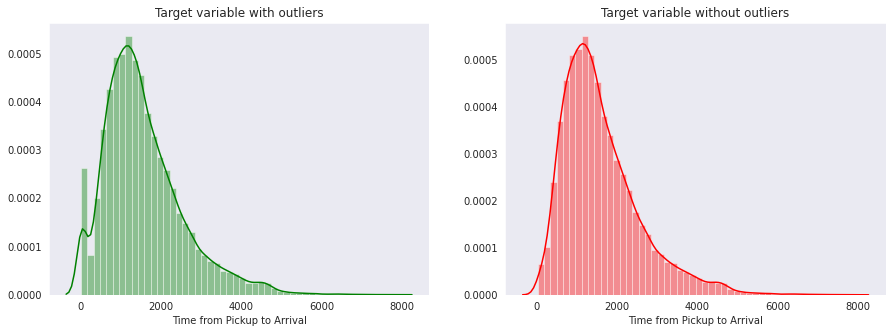

In [88]:
# Remove outliers
new_train= train[train['Not outlier']==True]
fig,axis= plt.subplots(ncols=2, figsize=(15, 5))
sns.distplot(train['Time from Pickup to Arrival'], ax=axis[0], color='green')
sns.distplot(new_train['Time from Pickup to Arrival'], ax=axis[1], color='red')
axis[0].set_title('Target variable with outliers', fontsize=12)
axis[1].set_title('Target variable without outliers', fontsize=12)
axis[0].set_xlabel('Time from Pickup to Arrival', fontsize=10)
axis[1].set_xlabel('Time from Pickup to Arrival', fontsize=10)
plt.show()

# Remove outlier column
train= train[train['Not outlier'] == True]
train= train.drop(['Not outlier'], axis=1)

## Exploratory data analysis

Data summery statistics

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20505 entries, 0 to 21200
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Order No                               20505 non-null  object 
 1   User Id                                20505 non-null  object 
 2   Vehicle Type                           20505 non-null  object 
 3   Platform Type                          20505 non-null  int64  
 4   Personal or Business                   20505 non-null  object 
 5   Placement - Day of Month               20505 non-null  int64  
 6   Placement - Weekday                    20505 non-null  int64  
 7   Placement - Time                       20505 non-null  object 
 8   Confirmation - Day of Month            20505 non-null  int64  
 9   Confirmation - Weekday                 20505 non-null  int64  
 10  Confirmation - Time                    20505 non-null  object 
 11  Ar

In [90]:
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday,Confirmation - Day of Month,Confirmation - Weekday,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,Pickup - Day of Month,Pickup - Weekday,Arrival at Destination - Day of Month,Arrival at Destination - Weekday,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No of Orders,Age,Average Rating,No of Ratings
count,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000,20505.000000
mean,2.745379,15.641551,3.241600,15.641697,3.241746,15.641697,3.241746,15.641697,3.241746,15.641697,3.241746,9.607998,23.227811,-1.281277,36.811138,-1.282609,36.811258,1609.512753,1647.029066,976.132504,13.889710,340.364789
std,0.632302,8.789174,1.568614,8.789144,1.568545,8.789144,1.568545,8.789144,1.568545,8.789144,1.568545,5.672881,3.227694,0.030589,0.037736,0.035081,0.045002,961.005156,1506.477797,640.153976,0.911349,404.025122
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,33.000000,2.000000,96.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.300000,-1.300921,36.783799,-1.301446,36.785586,926.000000,557.000000,495.000000,13.700000,60.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,-1.279395,36.806629,-1.284467,36.807974,1404.000000,1209.000000,872.000000,14.000000,158.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.200000,-1.257147,36.828889,-1.261072,36.829263,2070.000000,2273.000000,1218.000000,14.300000,501.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,9756.000000,3764.000000,15.200000,2298.000000


Single variable data
>* Platform Type
>* Customer Type(Personal or Business)
>* Orders and Deliveries Per Weekday
>* Orders and Deliveries Per Day of the Month
>* Distance from Pickup to Destination

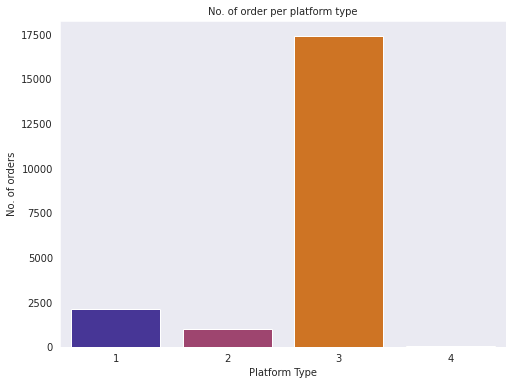

In [91]:
# Platform Type
fig, axis= plt.subplots(figsize=(8, 6))
ax_PT= sns.countplot(x='Platform Type', data=train, palette='CMRmap')
plt.title('No. of order per platform type', fontsize=10)
plt.xlabel('Platform Type', fontsize=10)
plt.ylabel('No. of orders', fontsize=10)
plt.show()

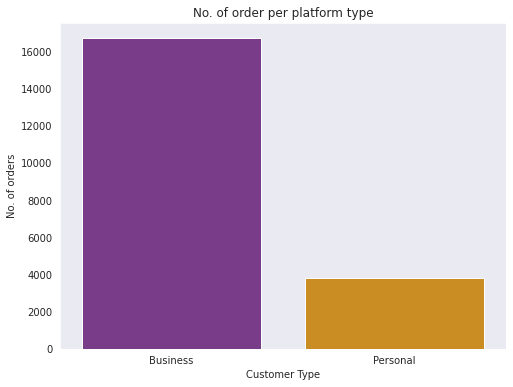

In [92]:
# Customer Type(Personal or Business)
fig, axis= plt.subplots(figsize=(8, 6))
ax_PT= sns.countplot(x='Personal or Business', data=train, palette='CMRmap')
plt.title('No. of order per platform type', fontsize=12)
plt.xlabel('Customer Type', fontsize=10)
plt.ylabel('No. of orders', fontsize=10)
plt.show()

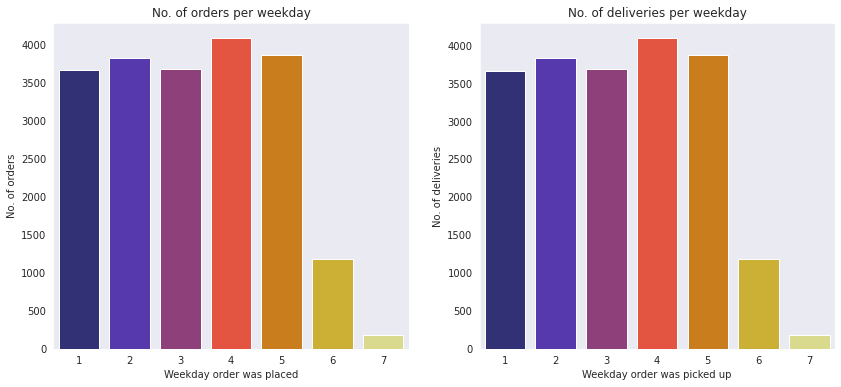

In [93]:
# Orders and Deliveries Per Weekday
fig,axis= plt.subplots(ncols=2, figsize=(14, 6))
sns.countplot(x='Placement - Weekday', data=train, palette='CMRmap', ax=axis[0])
sns.countplot(x='Pickup - Weekday', data=train, palette='CMRmap', ax=axis[1])
axis[0].set_title('No. of orders per weekday', fontsize=12)
axis[1].set_title('No. of deliveries per weekday', fontsize=12)
axis[0].set_xlabel('Weekday order was placed', fontsize=10)
axis[1].set_xlabel('Weekday order was picked up', fontsize=10)
axis[0].set_ylabel('No. of orders', fontsize=10)
axis[1].set_ylabel('No. of deliveries', fontsize=10)
plt.show()

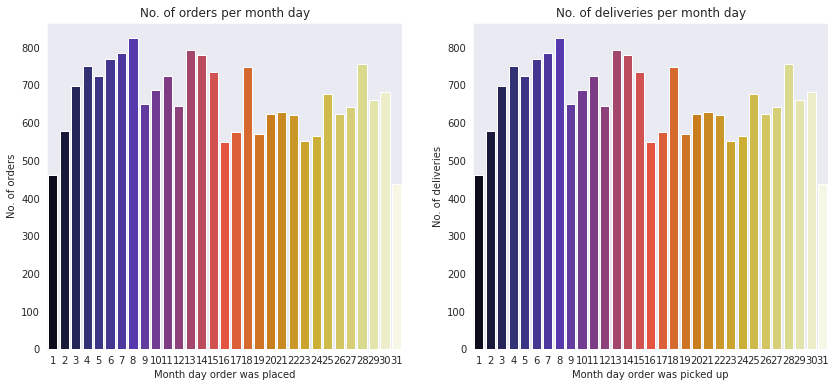

In [94]:
# Orders and Deliveries Per Day of the Month
fig,axis= plt.subplots(ncols=2, figsize=(14, 6))
sns.countplot(x='Placement - Day of Month', data=train, palette='CMRmap', ax=axis[0])
sns.countplot(x='Pickup - Day of Month', data=train, palette='CMRmap', ax=axis[1])
axis[0].set_title('No. of orders per month day', fontsize=12)
axis[1].set_title('No. of deliveries per month day', fontsize=12)
axis[0].set_xlabel('Month day order was placed', fontsize=10)
axis[1].set_xlabel('Month day order was picked up', fontsize=10)
axis[0].set_ylabel('No. of orders', fontsize=10)
axis[1].set_ylabel('No. of deliveries', fontsize=10)
plt.show()

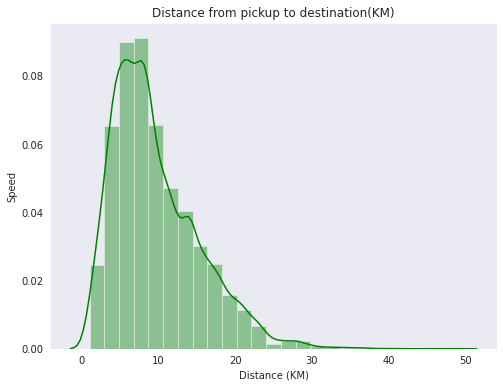

In [95]:
# Distance from Pickup to Destination
fig, axis= plt.subplots(figsize=(8, 6))
sns.distplot(train['Distance (KM)'], bins=25, color='green')
plt.title('Distance from pickup to destination(KM)', fontsize=12)
plt.xlabel('Distance (KM)', fontsize=10)
plt.ylabel('Speed', fontsize=10)
plt.show()

## **Data preprocessing**

**ENCODING CATEGORICAL DATA**

Encoding the Independent Variable

In [0]:
#train = pd.get_dummies(train, columns=['Personal or Business'], drop_first=True)
#train = pd.get_dummies(train, columns=['Platform Type'], drop_first=True)
#train.head()

In [0]:
# Number of times in seconds
def time_in_seconds_train(column):
    train[column]= pd.to_datetime(train[column])
    return (train[column] - pd.to_datetime(pd.to_datetime('today').date())).astype('timedelta64[s]')

# converting time in dataset
train['Placement - Time']= time_in_seconds_train('Placement - Time')
train['Confirmation - Time']= time_in_seconds_train('Confirmation - Time')
train['Pickup - Time']= time_in_seconds_train('Pickup - Time')
train['Arrival at Pickup - Time']= time_in_seconds_train('Arrival at Pickup - Time')
train['Arrival at Destination - Time']= time_in_seconds_train('Arrival at Destination - Time')

In [98]:
# Checking how many unique items are in each column of independent variables
for col_name in train.columns:
  if train[col_name].dtypes == 'object':
    unique_out= len(train[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique catergories")

Feature 'Order No' has 20505 unique catergories
Feature 'User Id' has 3175 unique catergories
Feature 'Vehicle Type' has 1 unique catergories
Feature 'Personal or Business' has 2 unique catergories
Feature 'Rider Id' has 922 unique catergories
Feature 'Placement - Time(bins)' has 17 unique catergories


In [0]:
# Number of times in seconds for test
def time_in_seconds_test(column):
    test[column]= pd.to_datetime(test[column])
    return (test[column] - pd.to_datetime(pd.to_datetime('today').date())).astype('timedelta64[s]')

# Converting time in testset
test['Placement - Time']= time_in_seconds_test('Placement - Time')
test['Confirmation - Time']= time_in_seconds_test('Confirmation - Time')
test['Pickup - Time']= time_in_seconds_test('Pickup - Time')
test['Arrival at Pickup - Time']= time_in_seconds_test('Arrival at Pickup - Time')

In [100]:
# Checking how many unique items are in each column of independent variables
for col_name in test.columns:
  if test[col_name].dtypes == 'object':
    unique_out= len(test[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique catergories")

Feature 'Order No' has 7068 unique catergories
Feature 'User Id' has 1617 unique catergories
Feature 'Vehicle Type' has 1 unique catergories
Feature 'Personal or Business' has 2 unique catergories
Feature 'Rider Id' has 822 unique catergories


In [101]:
# Drop useless columns
train= train.drop(['Order No', 'User Id', 'Vehicle Type', 'Rider Id', 'Placement - Time(bins)'], axis=1)

# Rearrange columns
column_titles= [col for col in train.columns if col != 'Time from Pickup to Arrival'] + ['Time from Pickup to Arrival']
train= train.reindex(columns=column_titles)
train.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday,Placement - Time,Confirmation - Day of Month,Confirmation - Weekday,Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday,Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday,Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No of Orders,Age,Average Rating,No of Ratings,Time from Pickup to Arrival
0,3,Business,9,5,34546.0,9,5,34810.0,9,5,36287.0,9,5,37650.0,9,5,38395.0,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,549,745
1,3,Personal,12,5,40576.0,12,5,41001.0,12,5,42022.0,12,5,42249.0,12,5,44242.0,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,396,339,13.6,69,1993
2,3,Business,30,2,45565.0,30,2,45764.0,30,2,46174.0,30,2,46383.0,30,2,46838.0,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,1023,242,12.5,114,455
3,3,Business,15,5,33934.0,15,5,33965.0,15,5,34676.0,15,5,34986.0,15,5,36327.0,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,886,283,14.5,113,1341
4,1,Personal,13,1,35718.0,13,1,35778.0,13,1,36233.0,13,1,36323.0,13,1,37537.0,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,2311,872,14.1,533,1214


In [102]:
test.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id', 'No of Orders',
       'Age', 'Average Rating', 'No of Ratings'],
      dtype='object')

In [0]:
# Drop useless columns in test
test= test.drop(['Order No', 'User Id', 'Vehicle Type', 'Rider Id', 'Placement - Time'], axis=1)

# Rearrange columns
column_titles= list(test.columns)
y= train.iloc[:, -1].values
train= train.reindex(columns=column_titles)


Encoding the Dependent Variable

In [104]:
train.columns

Index(['Platform Type', 'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday', 'Confirmation - Day of Month',
       'Confirmation - Weekday', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday',
       'Arrival at Pickup - Time', 'Pickup - Day of Month', 'Pickup - Weekday',
       'Pickup - Time', 'Distance (KM)', 'Temperature', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long', 'No of Orders',
       'Age', 'Average Rating', 'No of Ratings'],
      dtype='object')

In [105]:
# Create metrix of features 
X= train.values
#y= train.iloc[:, -1].values

# Encode categorival data
le= LabelEncoder()
X[:, 1]= le.fit_transform(X[:, 1])

ct= ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X= np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 1.0 ... 1309 13.8 549]
 [0.0 0.0 1.0 ... 339 13.6 69]
 [0.0 0.0 1.0 ... 242 12.5 114]
 ...
 [0.0 0.0 1.0 ... 473 13.8 29]
 [1.0 0.0 0.0 ... 1821 14.0 1101]
 [0.0 0.0 1.0 ... 286 13.6 70]]


In [106]:
X.shape

(20505, 26)

In [107]:
print(y)

[ 745 1993  455 ... 2953 1380 2128]


In [108]:
# Create metrix of features for test 
Xtest= test
#y= test.iloc[:, -1].values

# Encode categorival data
le= LabelEncoder()
Xtest.iloc[:, 1]= le.fit_transform(Xtest.iloc[:, 1])

ct= ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
Xtest= np.array(ct.fit_transform(Xtest))
Xtest

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 1.511e+03, 1.330e+01,
        1.710e+02],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.730e+02, 1.440e+01,
        4.500e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 4.600e+02, 1.310e+01,
        6.700e+01],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.337e+03, 1.370e+01,
        4.410e+02],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 8.780e+02, 1.410e+01,
        6.600e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.970e+02, 1.400e+01,
        1.080e+02]])

**Splitting the dataset into the Training set and Test set**

In [0]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 1)

**Feature Scaling**

In [110]:
train.isnull().any().all()

False

In [0]:
Xx = train.iloc[:, :-1]
Yy = train.iloc[:, -1]

In [112]:
Xx.shape

(20505, 22)

In [113]:
RFR= RandomForestRegressor(n_jobs=-1, max_depth=5)
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
#sc_X= StandardScaler()
#X_train[:,5:]= sc_X.fit_transform(X_train[:,5:])
#X_test[:,5:]= sc_X.transform(X_test[:,5:])

# **3.1 Fit model**

In [115]:
y_pred = RFR.predict(X_test)
results = np.sqrt(mse(y_test, y_pred))
results

778.673665896496

# **4.1 Perfomance evaluation**

In [116]:
final_pred = RFR.predict(Xtest)
submission = pd.read_csv('SampleSubmission.csv')
submission.head()


,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


In [0]:
final_pred[3:]
for row in range(3, len(submission)):
    submission.loc[row,'Time from Pickup to Arrival'] = final_pred[row]
submission.head(10)
submission.to_csv('Forest_model.csv', index=False)

# **Model 2**

# **3.2 Fit model 2**

In [0]:
train_df = train[['Distance (KM)', 'Time from Pickup to Arrival']]
test_df = test[['Distance (KM)']]
train_df.head()

,Distance (KM),Time from Pickup to Arrival
0,4.0,745.0
1,16.0,1993.0
2,3.0,455.0
3,9.0,1341.0
4,9.0,1214.0


**Splitting the dataset into the Training set and Test set**

In [0]:
X_train, X_test, y_train, y_test= train_test_split(train_df[['Distance (KM)']], train_df[['Time from Pickup to Arrival']], test_size = 0.2, random_state = 1)

In [0]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday,Placement - Time,Confirmation - Day of Month,Confirmation - Weekday,Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday,Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No of Orders,Age,Average Rating,No of Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,60250.0,27,3,60269.0,27,3,60784.0,27,3,61607.0,8,23.274194,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,46655.0,17,5,46757.0,17,5,48027.0,17,5,48337.0,5,23.274194,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,40094.0,27,4,41105.0,27,4,41600.0,27,4,43074.0,5,22.800000,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,49895.0,17,1,50007.0,17,1,50561.0,17,1,51412.0,5,24.500000,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,41428.0,11,2,41685.0,11,2,42439.0,11,2,42964.0,6,24.400000,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


In [0]:
X = train_df[['Distance (KM)']]
#y = train_df[['Time from Pickup to Arrival']]
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
results = np.sqrt(mse(y_test, y_pred))
results

788.1486757287727

# **4.2 Perfomance evaluation for model 2**

In [0]:
final_pred = lr_model.predict(test_df)
submission = pd.read_csv('SampleSubmission.csv')
submission.head()
final_pred[3:]
for row in range(3, len(submission)):
    submission.loc[row,'Time from Pickup to Arrival'] = final_pred[row:][0][0]
submission.head(10)
submission.to_csv('linear_model.csv', index=False)

# **5. Model analysis**

## Conclusion

The regression model has worked best in this notebook